In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the Auto dataset in a DataFrame using Pandas

In [93]:
data = pd.read_csv('data/auto-dataset.csv')
print(data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

### 1. Scatterplots between features
Using the plot() function in matplotlib and create scatterplots between all the variables.

Is the relationship between those variables linear? Describe exactly four different connections between the variables.

(Exclude the name variable, which is qualitative.)

Text(0.5, 1.0, 'Scatter Plot of mpg vs weight')

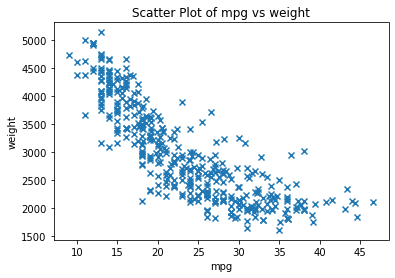

In [94]:
feat1 = data['mpg']
feat2 = data['weight']
plt.figure()
plt.scatter(feat1, feat2, marker='x')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('Scatter Plot of mpg vs weight')
#Similarly add scatter plots for every pair of features

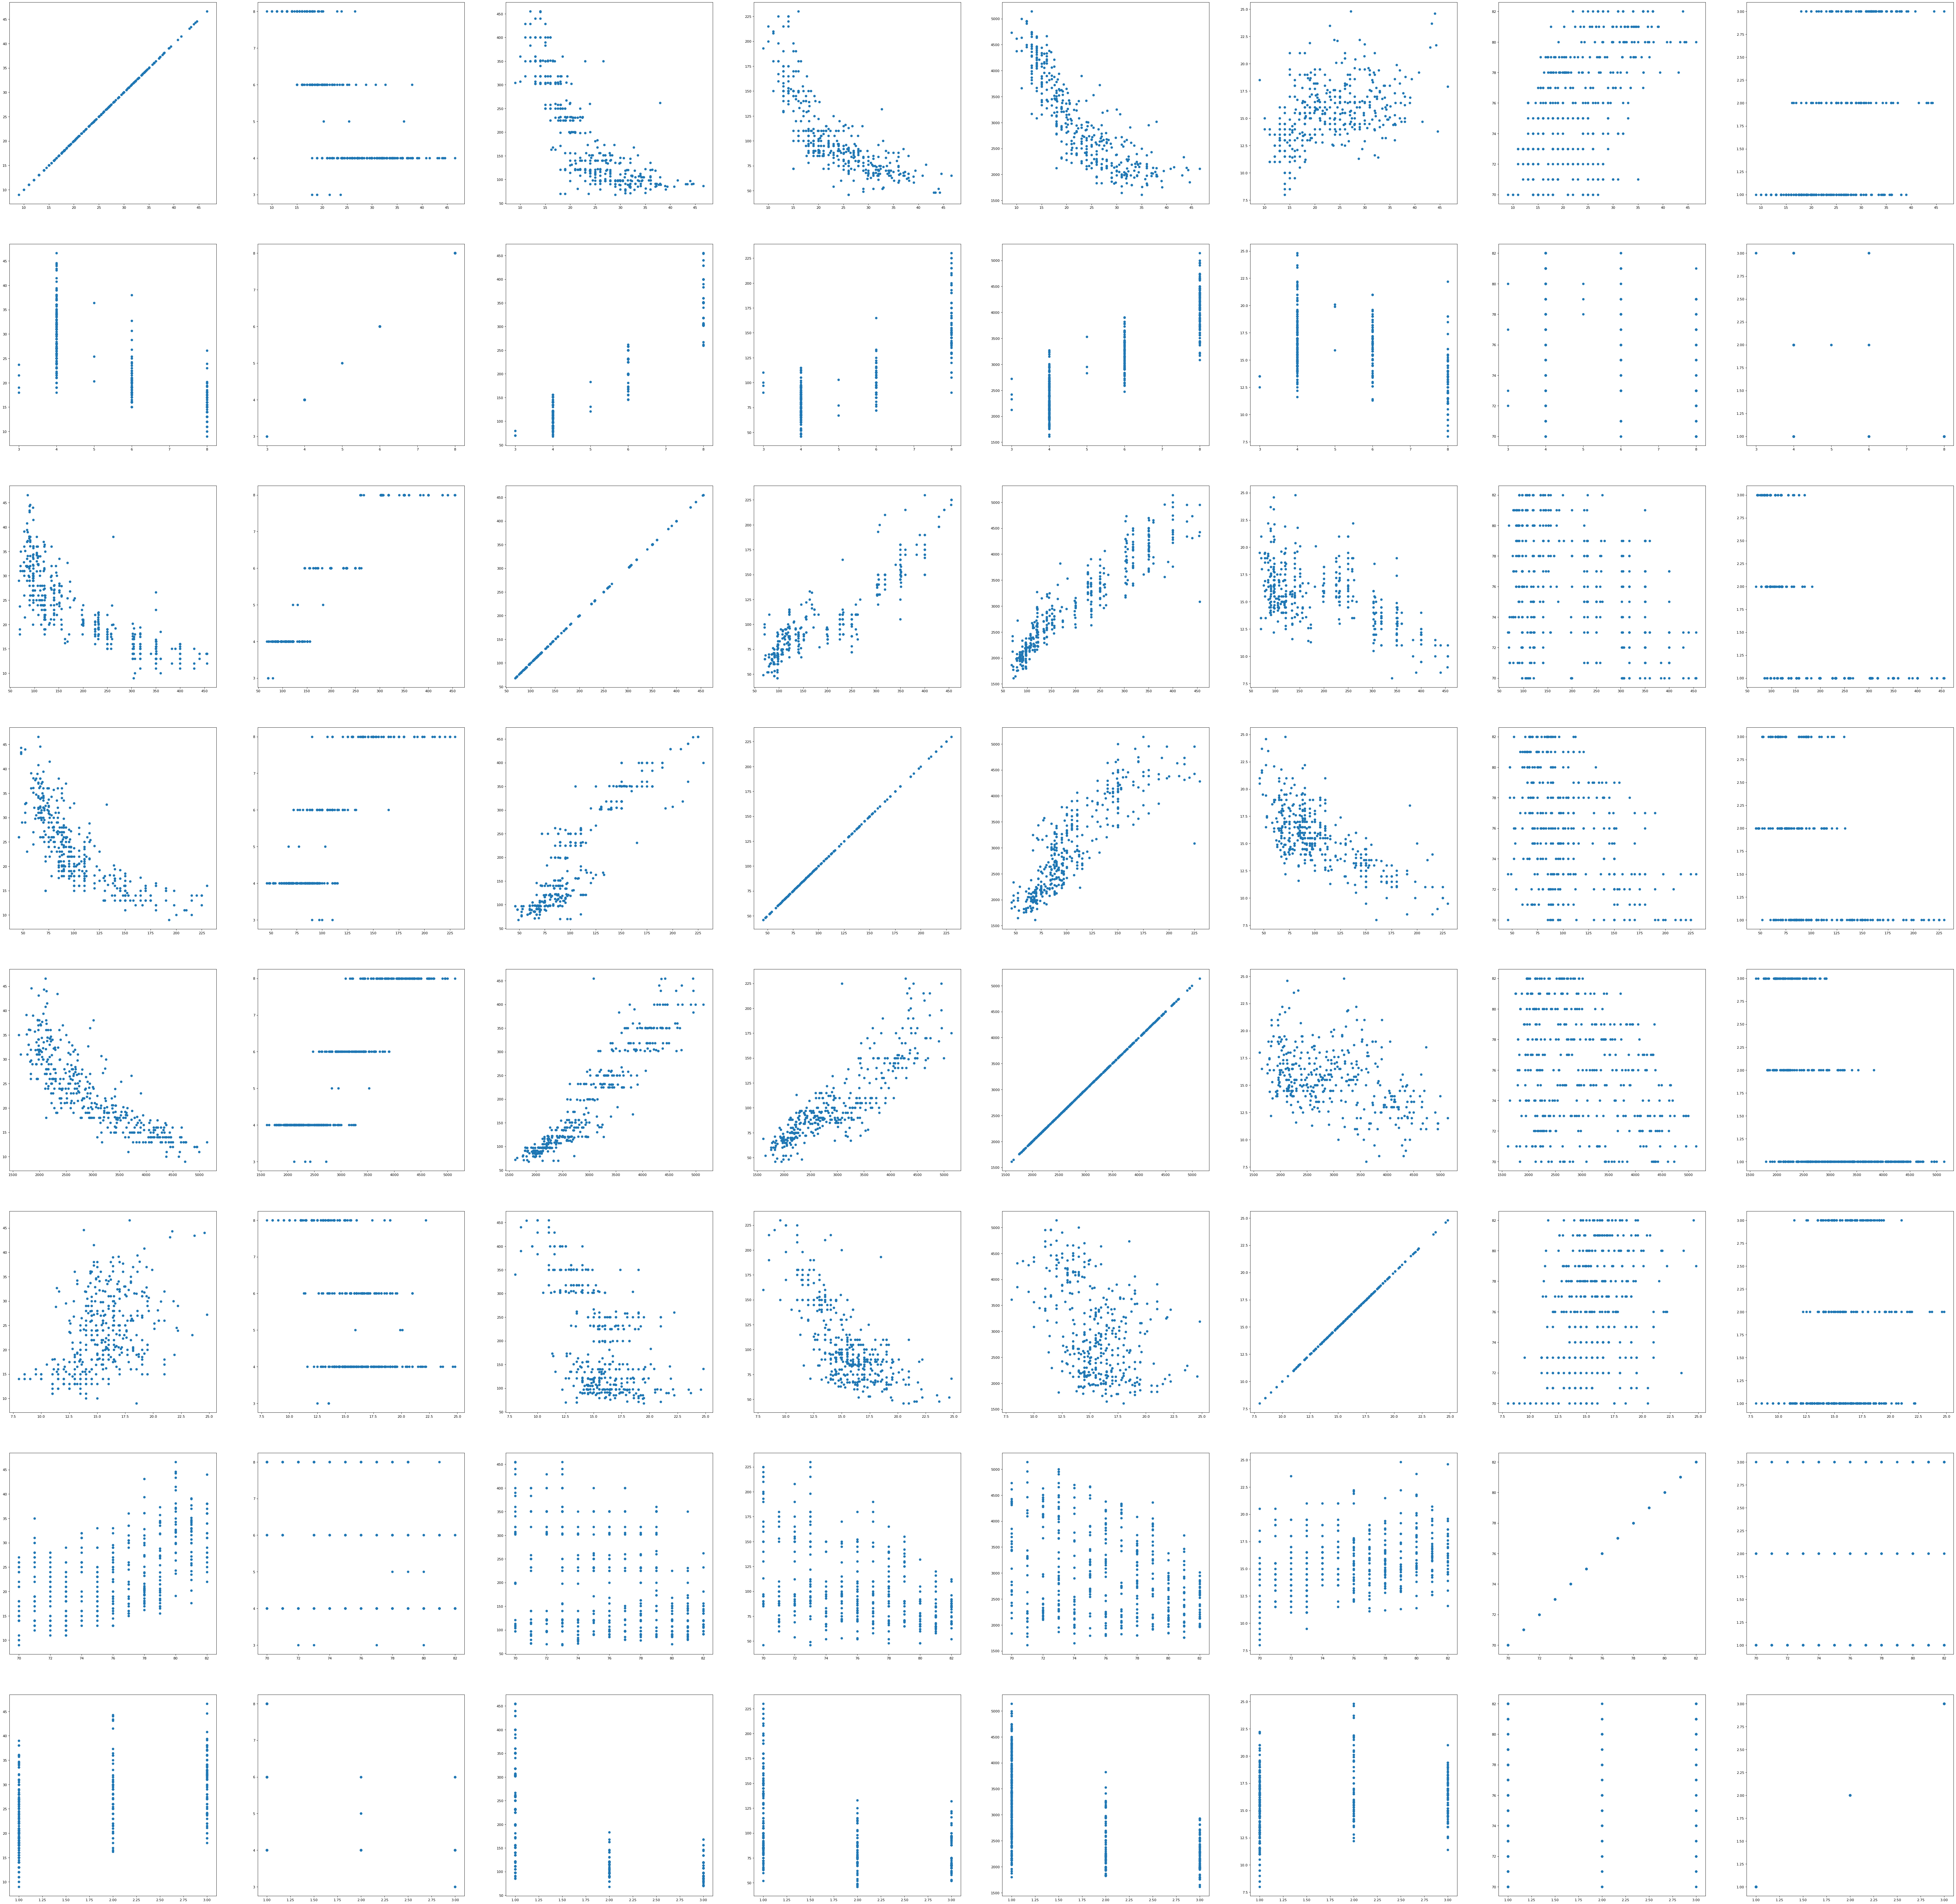

In [95]:
# Plot the feature plots to observe the relationships between all the predictors
feats = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
figure, axis = plt.subplots(8, 8 , figsize=(100, 100), dpi=80)
for i in range(8):
    for j in range(8):
        index = (i ,j)
        plt.subplot2grid((8,8), index, rowspan = 1, colspan = 1)
        plt.scatter(data[feats[i]], data[feats[j]], label = 'data')
plt.show()

# Legend
sorry, I couldn't seem to add titles / axis labels in a subplot grid, so here's my reference legend :\

| mpg vs mpg | | mpg vs cylinders | | mpg vs displacement | | mpg vs horsepower | | mpg vs weight | | mpg vs acceleration | | mpg vs year | | mpg vs origin | 

| cylinders vs mpg | | cylinders vs cylinders | | cylinders vs displacement | | cylinders vs horsepower | | cylinders vs weight | | cylinders vs acceleration | | cylinders vs year | | cylinders vs origin | 

| displacement vs mpg | | displacement vs cylinders | | displacement vs displacement | | displacement vs horsepower | | displacement vs weight | | displacement vs acceleration | | displacement vs year | | displacement vs origin | 

| horsepower vs mpg | | horsepower vs cylinders | | horsepower vs displacement | | horsepower vs horsepower | | horsepower vs weight | | horsepower vs acceleration | | horsepower vs year | | horsepower vs origin | 

| weight vs mpg | | weight vs cylinders | | weight vs displacement | | weight vs horsepower | | weight vs weight | | weight vs acceleration | | weight vs year | | weight vs origin | 

| acceleration vs mpg | | acceleration vs cylinders | | acceleration vs displacement | | acceleration vs horsepower | | acceleration vs weight | | acceleration vs acceleration | | acceleration vs year | | acceleration vs origin | 

| year vs mpg | | year vs cylinders | | year vs displacement | | year vs horsepower | | year vs weight | | year vs acceleration | | year vs year | | year vs origin | 

| origin vs mpg | | origin vs cylinders | | origin vs displacement | | origin vs horsepower | | origin vs weight | | origin vs acceleration | | origin vs year | | origin vs origin | 

Describe exactly four different connections between the variables:

    1) horsepower vs displacement appears to have a positive, roughly linear relationship.
    2) horsepower vs acceleratioj appears to have a negative, roughly linear relationship (though starting to look like a banana).
    3) mpg vs displacement, mpg vs horsepower, and mpg vs weight all show a negative, banana-shaped (quadratic, perhaps?) relationship.
    4) year vs origin doesn't appear to have any sort of relationship.

### 2. Correlation

Detect the two variable pairs in the scatterplots that appear to be the most highly correlated and anti-correlated, respectively.

Justify your choice using the np.corrcoef() function.

Do the results from np.corrcoef() differ from what you see in the plot?

In [96]:
# Use np corrcoef to observe the correlation between  predictors
corr_disp_wt = np.corrcoef(data["displacement"], data["weight"])
print(f"displacement vs weight: {corr_disp_wt[0][1]}")
# displacement vs weight looks higly correlated, and indeed has a correlation coefficient of 0.93
corr_disp_hp = np.corrcoef(data["displacement"], data["horsepower"])
print(f"diplacement vs horsepwer: {corr_disp_hp[0][1]}")
corr_accel_year = np.corrcoef(data["acceleration"], data["year"])
print(f"acceleration vs year: {corr_accel_year[0][1]}")
corr_orig_year = np.corrcoef(data["origin"], data["year"])
print(f"origin vs year: {corr_orig_year[0][1]}")
# origin vs year looks pretty uncorrelated, and has a correlation of only 0.18

# But let's test it, just to be sure.
feats = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
min = 1
minners = ""
max = 0
maxers = ""
for i in range(8):
    for j in range(8):
        if i == j:
            continue
        score = abs(np.corrcoef(data[feats[i]], data[feats[j]]))
        if score[0][1] < min:
            min = score[0][1]
            minners = f"{feats[i]} vs {feats[j]}"
        if score[0][1] > max:
            max = score[0][1]
            maxers = f"{feats[i]} vs {feats[j]}"
print(f"Overall least correlated: {minners} @ {round(min,2)},\n Overall most correlated: {maxers} @ {round(max, 2)}")

displacement vs weight: 0.9329944040890104
diplacement vs horsepwer: 0.8972570018434686
acceleration vs year: 0.29031611333652
origin vs year: 0.18152771836633097
Overall least correlated: origin vs year @ 0.18,
 Overall most correlated: cylinders vs displacement @ 0.95


Results:

displacement vs weight: 0.9329944040890104

diplacement vs horsepwer: 0.8972570018434686

acceleration vs year: 0.29031611333652

origin vs year: 0.18152771836633097

Overall least correlated: origin vs year @ 0.18,

Overall most correlated: cylinders vs displacement @ 0.95

### 3. Linear Regression

Perform simple linear regression with mpg as the response using the variables:

        cylinders, displacement, horsepower, year

as features using the LinearRegression() function provided in the sklearn package.

Which predictors appear to have a statistically significant relationship to the outcome (use an appropriate measurement)?

How good are the resulting models (provide all four R2 values)?

In [97]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

y = np.array(data['mpg'])
x = np.array(data['cylinders'])
print(x.shape, y.shape)
# Use the fit function and the score function in linear regression module of sklearn to  fit the data and observe the fit
linear_model.fit(x.reshape(-1, 1), y)
linear_model.score(x.reshape(-1, 1), y)

(392,) (392,)


0.6046889889441246

In [98]:
# Fit the linear regression on mpg for the other features: cylinder, horsepower, year and displacement
feats = ["cylinders", "displacement", "horsepower", "year"]
y = np.array(data['mpg'])
for feat in feats:
    linear_model = LinearRegression()
    x = np.array(data[feat])
    linear_model.fit(x.reshape(-1, 1), y)
    print(f"Score for mpg as a function of {feat}:", linear_model.score(x.reshape(-1, 1), y))


Score for mpg as a function of cylinders: 0.6046889889441246
Score for mpg as a function of displacement: 0.6482294003193044
Score for mpg as a function of horsepower: 0.6059482578894348
Score for mpg as a function of year: 0.33702781330962295


Results:

    Score for mpg as a function of cylinders: 0.6046889889441246
    Score for mpg as a function of displacement: 0.6482294003193044
    Score for mpg as a function of horsepower: 0.6059482578894348
    Score for mpg as a function of year: 0.33702781330962295

mpg as a function of year seems to be the least correlated, with an R^2 of only 0.34

Out of a best possible R^2 value of 1.0, the other variables being between 0.60 and 0.65 does not seem to be all that high of an impact.

### 4. Multiple Linear Regression

Use the LinearRegression() function to perform one multiple linear regression with mpg as
the response and all other variables except name as the predictors.

Use the score() and get params() functions to print the results.

Compare the full model to those generated in 5.3:

    (a) How is the model fit (using R^2)?
    
    (b) What can you observe in the different models concerning the significance of the relationship between response and individual predictors? 
        What does the sign of the coefficient (i.e. of the estimate) tell you about the relationship between the predictor and the response? 
        Provide an example from your fitted model.

In [99]:
#Multiple Linear Regression
#Create a 2D matrix with each column representing all features
#Look up np.concatenate or np.stack
feats = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
mpg_array = np.array(data["mpg"])
cylinders_array = np.array(data["cylinders"])
displacement_array = np.array(data["displacement"])
horsepower_array = np.array(data["horsepower"])
weight_array = np.array(data["weight"])
acceleration_array = np.array(data["acceleration"])
year_array = np.array(data["year"])
origin_array = np.array(data["origin"])

combined_arrays = np.stack((cylinders_array, displacement_array, horsepower_array, weight_array, acceleration_array, year_array, origin_array), axis = 1)
   
#Print the predictions of the your fitted model and the weights of Linear Regression (look at the function get_params())
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(combined_arrays, mpg_array)
mlm_score = multiple_linear_model.score(combined_arrays, mpg_array)
print(mlm_score)
#params = multiple_linear_model.get_params()
#print(params)
coefs = multiple_linear_model.coef_
print(coefs)
predictions = multiple_linear_model.predict(combined_arrays)
print(predictions)

0.8214780764810599
[-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
[15.00095865 13.99929917 15.24044696 15.06190592 14.96717762 10.69562338
 10.6553509  10.69318951 10.21140958 13.11319398 15.29186157 14.14690266
 14.64696189 18.88015369 24.13062472 19.03847473 19.40643664 20.88068005
 25.45738302 27.13648841 21.03963303 22.25408365 22.7074409  23.25050717
 20.3005362   7.58306997  8.41074023  8.30037285  6.44696729 26.20815569
 23.39053912 25.73308381 21.46783861 16.23364804 17.52793963 17.90615253
 17.43525382 11.44975337 10.58385513 12.14999889 11.87950268  6.98211816
  8.88321853  6.24768971 19.73241559 23.0454129  17.79193175 18.88084577
 23.26421626 25.13116053 25.49443983 25.22718096 28.75457004 29.66193221
 27.53555535 25.15803406 26.28101808 24.47954013 26.03152794 23.5313529
 24.17758427 11.77971323 11.88636515 12.41807558 13.02233473 14.97586698
 10.21781246 10.59400653 10.80705681 11.4328463  25.38717749 13.63215327
 12.81807391 11.441

### 5. Residuals

Use the plot() function to produce the residual versus fitted plot of the multiple linear regression fit.

Identify the residual plot.

Does the residual plot suggest any non-linearity in the data (provide an explanation)?

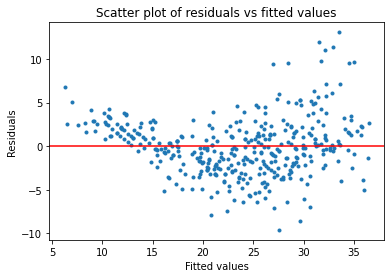

In [100]:
#Make a scatter plot of the residual vs the predictions of your linear regression model
#predictions = multiple_linear_model.predict(combined_arrays)
residuals = (data['mpg'] - predictions)
plt.figure()
plt.scatter(predictions, residuals, marker='.')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title("Scatter plot of residuals vs fitted values")
plt.axhline(y = np.nanmean(residuals), color = "red")

The residual plot shows non-linearity (banana in space), indicating a potential quadratic term in the model.

The residuals also display evidence of heteroscedacticity, increasing variance as the fitted value increased.